# Exploratory Data Analysis

### Roles to Explore:

In [2]:
# Importing libraries
import ast 
import pandas as pd
import seaborn as sns
from datasets import load_dataset 
import matplotlib.pyplot as plt 

# Loading Data 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Filter for Malaysia Data Analyst roles

In [3]:
df_DA_MLY = df[(df['job_country'] == 'Malaysia') & (df['job_title_short'] == 'Data Analyst')].copy()

df_DA_MLY['job_location'] = df_DA_MLY['job_location'].str.replace(', Malaysia', '', regex=False)

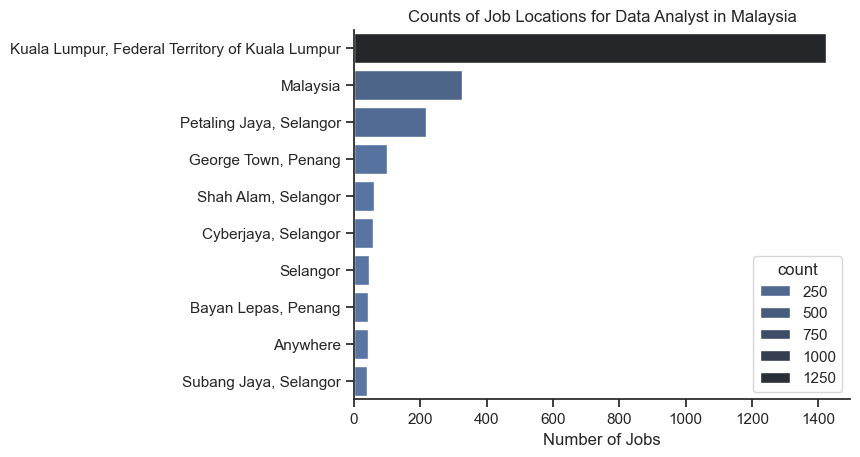

In [4]:
df_plot = df_DA_MLY['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Malaysia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities 

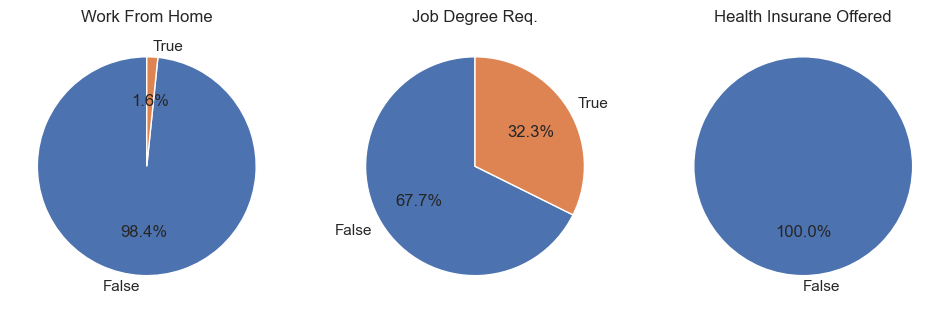

In [8]:
# Rewrite the above with a for loop
dict_column ={
    'job_work_from_home' : 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurane Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12,5))

for i, (column, title) in enumerate(dict_column.items()):
    # Get the counts and the corresponding labels
    counts = df_DA_MLY[column].value_counts()
    labels = counts.index.tolist() # Dynamically get the labels
    
    # Plotting the pie chart
    ax[i].pie(counts, startangle=90, autopct='%1.1f%%', labels=labels)
    ax[i].set_title(title)
plt.show()
fig.tight_layout()

### Companies to Explore

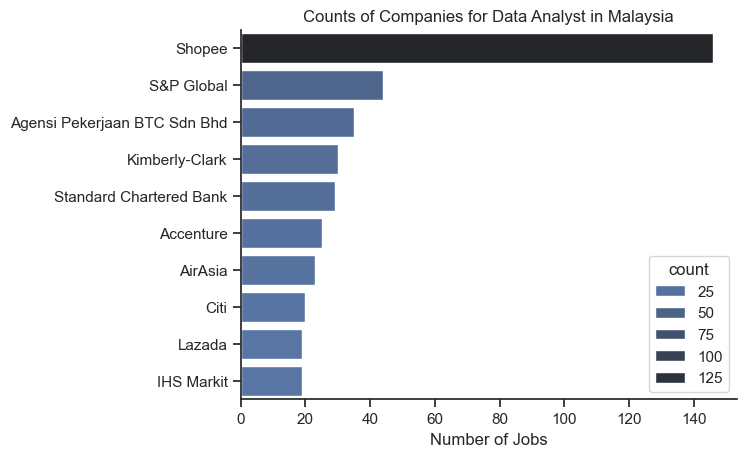

In [9]:
df_plot = df_DA_MLY['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style="ticks")
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r')
sns.despine()
plt.title('Counts of Companies for Data Analyst in Malaysia')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()